# Homework 2: Supervised Learning - k-Nearest Neighbor (kNN) Algorithm 

k-Nearest Neighbor (kNN) algorithm uses a simple idea: "you are what your neighbors are". In the first part of the assignment, we will cover some background needed to understand the kNN algorithm. In the second part, you will be asked to apply your knowledge on another data set. 

## Part A: kNN Tutorial with Questions (50% of grade)

Let us start by importing the needed libraries. We will continue using the sklearn library, which implements many of the most popular data science algorithms. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Let us load the Iris data set using a sklearn function `load_iris`.

In [2]:
iris = datasets.load_iris()

As you can see from http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html, `iris` is an object with features `data` (a 150x4 matrix, where $i$-th row are 4 features of the $i$-th flower), `feature_names` (the names of the 4 features), `target` (a vector of length 150, where $i$-th number is the type of the $i$-th flower -- in machine learning people often say "label" instead of "target"), `target_names` (these are strings explaining what each of the 3 types of flowers are), and `DESCR` (giving some information about the Iris data set). Let us list them all 

In [3]:
print(iris.DESCR)
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

So, we can see that the features of the second flower are `[4.9, 3.0, 1.4, 0.2]`, which means its `sepal_length` is 4.9 cm, `sepal_width` is 3.0 cm, `petal_length` is 1.4 cm, and `petal_width` is 0.2 cm. We will write it matematically as $x_2 = [x_{21}, x_{22}, x_{23}, x_{24}] = [4.9, 3.0, 1.4, 0.2]$. We see that its `target` is 0, which means the type of this iris is `setosa`. We will write it matematically as $y_2 = 0$. All this information was obtained by real botanists who studied iris flowers trying to understand the physical measurements that discriminate between the 3 different types of those flowers.

In machine learning, people like to denote this data set as $D_{Iris} = \{(x_i, y_i), i = 1, 2 ... 150\}$, meaning that data set $D_{Iris}$ is a set of 150 labeled examples $(x_i, y_i)$. An alternative is to write $D_{Iris} = \{X_{Iris}, Y_{Iris}\}$.

### Supervised Learning
Supervised learning is a game with the following objective. You are given the iris data set $D_{Iris}$ where you know 4 features and target values for 150 irises and your objective is to come up with a computer program that predicts a type of any iris flower given the values of its 4 attributes. Written in pseudocode, this is what you have to do:

`predictor = create(algorithm_type, D)
y_new = predictor(x_new)`

In the first line, you are running a `create` function that takes as input data set `D` and the name of a supervised learning algorithm `algorithm_type` and produces as an output a computer program `predictor`. In the second line, you are using `predictor` to predict the label (`y_new` value) for a flower whose features are given by `x_new`.

### kNN Algorithm
kNN is a popular supervised learning algorithm that allows us to create `predictor`. The idea of kNN is that the label of flower `x_new` depends on labels of flowers in its neighborhood. In particular, kNN finds the distance between `x_new` and every example `x` in data set `D`. Then, it looks at the label `y` of k examples which are the closest to `x_new`. The predicted label `y_new` is obtained as the most common label in the group of the k nearest neighbors.

**Parameter choice**. We need to make a few decisions when running kNN. The most important is the choice of `k`. If `k = 1`, then we are looking only at the hearest neighbor and it might not be a good idea if we are dealing with noisy data. If `k` is very large, then we might be counting far neighbors that might have different properties. Other decisions include the choice of distance metric (Euclidean is the standard one) and the choice whether to weight closer neighbors more than the farther ones.

**Accuracy**. When deciding which parameters to pick or which supervised learning algorithm to use (there are popular algorithms other than kNN), the question is how to measure which choice is better. The answer is to check if `predictor` provides accurate prediction. Given a data set `D`, a typical way to check accuracy is to randomly split `D` into two data sets, `D_train` and `D_test`. Then, `predictor` is created/trained using `D_train` data set and its accuracy is checked using `D_test`. In particular, we use `predictor` to predict label of every example from `D_test` and compare it with the true labels. The percentage of the correct guesses on `D_test` is reported as accuracy of `predictor`.

## kNN Demo
The following piece of code is taken from:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py. Let us run it (it is guaranteed to run with Python 2.7).

<Figure size 432x288 with 0 Axes>

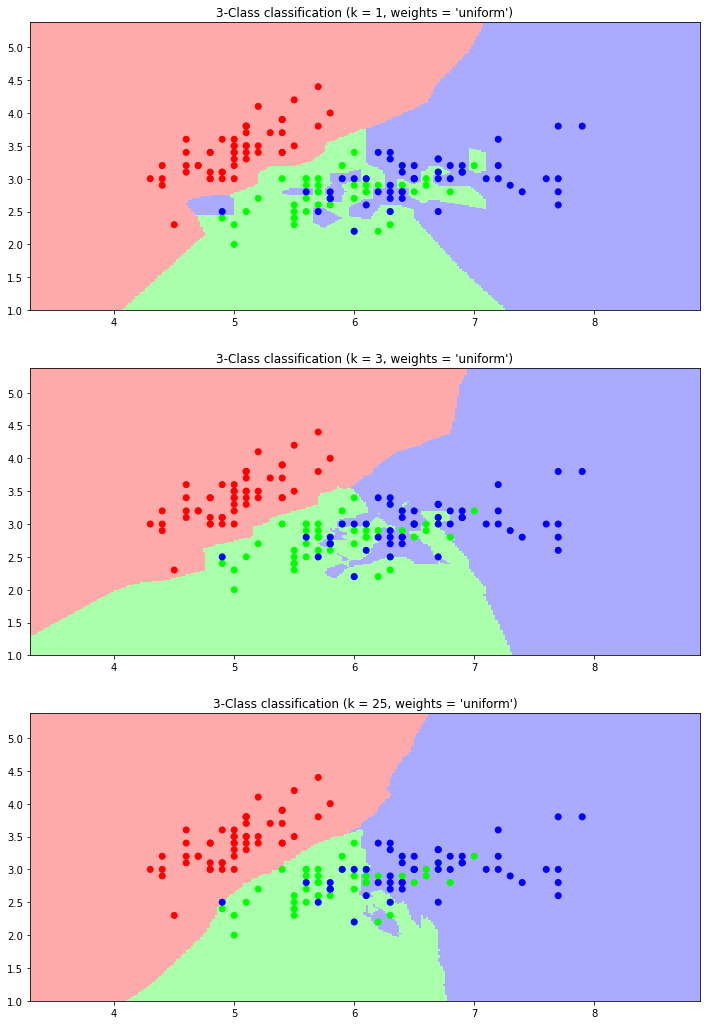

In [4]:
X = iris.data[:, [0,1]]  # use only the first two features (because we want to do the demo in a 2-D plane).
y = iris.target

# create a mesh grid of range [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) # Create color maps for decision boundaries
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF']) # # Create color maps for training samples



K = [1, 3, 25]
plt.figure()
plt.figure(figsize=(12,6*len(K)))   # set figure size, each figure is of size (12, 6) and we are going to plot len(K) figures stacked vertically
for i, k in enumerate(K):
    plt.subplot(len(K), 1, i+1)
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each point on the mesh grid and predict which class it belongs to
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

The resulting figure shows the predictions of kNN when $k=1$. If `x_new` is in the blue region, the prediction will be the blue class. From this picture, we can observe a small blue blobs inside the predominantly gray area. This is because the nearest neighbor in this area is the blue example. 

**Question 1**. Change value of k to 3 and observe if there is any difference. Discuss what you see and why.
The small green bulbs blue blob inside the dominant blue area has disappeared, because there is only one green sample in the area.

The blue blobs inside the green area shrink or even disappear because green neighbors become dominant as k increases.

**Question 2**. Change k to an even higher value, let us say to 25. What do we see now? Discuss.

The blobs inside different color areas shrink or even disappear because samples of the same color of the areas become dominant as k increases.

**Queston 3**. In the line that creates `clf` change weights='uniform' to weights='distance'. Check the documentation or google to understand what it means. Explain. Run the code and discuss if you see any difference.
 
 This means the k neighbors are weighted by their distance to the query point. Closer neighbors to the point will have a greater influence than neighbors which are further away. The decision boundary for distance weight are more smooth compared to the uniform weight.

<Figure size 432x288 with 0 Axes>

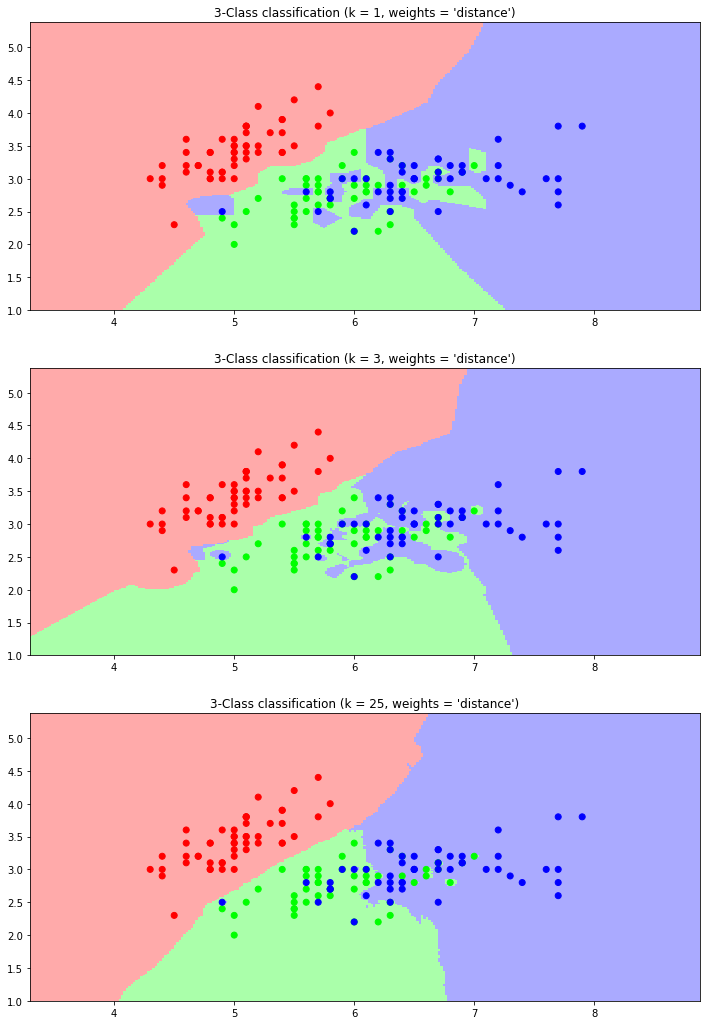

In [5]:
plt.figure()
plt.figure(figsize=(12,6*len(K)))
for i, k in enumerate(K):
    plt.subplot(len(K), 1, i+1)
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k, weights='distance')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'distance'))
plt.show()

**Question 4**. Take a look at the code and try to understand what each line of the code does. Explain each line of code.

Please check comments in cell 17.

### Training and testing
  As mentioned above, the typical mechanism for testing accuracy of a `predictor` is to split the data randomly into training and testing, train `predictor` on training data and test its performance on test data. Let us see how it can be done.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

**Question 5**. What is the size of the resulting objects?

`X_train` and `y_train`: `len(X) * (1 - test_size)`

`X_test` and `y_test`: `len(X) * test_size`

Now that we created training and test sets, we can train a kNN classifier using the training data. Before moving forward, let us take a second and take a look at the documentation for kNN implementation in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Let us train the kNN predictor:

In [13]:
#from sklearn.neighbors import KNeighborsClassifier
k = 1   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
print(predictor)

KNeighborsClassifier(n_neighbors=1)


Now that we trained `predictor` we can use it to provide predictions on any example `x`. 

In [14]:
# select the first 4 test examples
i = [0,1,2,3]
x = X_test[i,:]
print(x)
# predict its label
yhat = predictor.predict(x)
# compare predicted and true labels
print(np.array([[i, j] for i,j in zip(yhat,y_test[i])]))

[[7.7 2.6]
 [6.4 2.7]
 [5.2 3.5]
 [6.3 3.4]]
[[2 2]
 [2 2]
 [0 0]
 [2 2]]


**Question 6**. Did your kNN predictor do a good job in predicting labels of the first 4 test examples? 

Yes, all the 4 test samples are predicted correctly.

**Question 7**. Write a piece of code that calculates the accuracy on those 4 test examples (number of correct guesses divided by the total number of guesses)


In [15]:
print('Accurary on the 4 test samples: ', sum([1 if yh == y else 0 for yh, y in zip(yhat, y_test[i])])/len(yhat))

Accurary on the 4 test samples:  1.0


**Question 8**. Find the predictions on all test examples in `X_test` and calculate the accuracy using your code from *Question 7*.

Pay attention that methods in sklearn.neighbors.KNeighborsClassifier allow you to test the accuracy in a faster way (you should not use it to answer Questions 7 and 8):

In [16]:
yhat = predictor.predict(X_test)
print('Accurary on all the test samples: ', sum([1 if yh == y else 0 for yh, y in zip(yhat, y_test)])/len(yhat))

Accurary on all the test samples:  0.78


In [17]:
accuracy = predictor.score(X_test,y_test)
print(accuracy)

0.78


**Question 9**. Train `predictor` using different choices of k. Try $k = 1, 3, 5, 15, 25, 50$. Report the accuracies on the test data (you can use the score method). Which choice of $k$ resulted in the highest accuracy? Comment briefly if the results make sense to you.

As shown in the cell below, $k=25$ has the highest accuracy. This makes sense because there are 100 training samples, and each class accounts approximately for one third. If $k$ is more than the number of samples in its true class, we will consult unnecessary neighbors that of different classes.

In [20]:
K = [1, 3, 5, 15, 25, 50]
classCnt = [0]*3
for y in y_test:
    classCnt[y] += 1/len(y_test)
print('Number of training samples: {}. Share of each class in the training samples:'.format(len(y_train)))
for cnt, name in zip(classCnt, iris.target_names):
    print('\t{} : {:.2f}'.format(name, cnt))

for k in K:
    predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
    predictor.fit(X_train, y_train);
    accuracy = predictor.score(X_test,y_test)
    print('Accuracy for k = {}: '.format(k), accuracy)




Number of training samples: 100. Share of each class in the training samples:
	setosa : 0.30
	versicolor : 0.28
	virginica : 0.42
50
Accuracy for k = 1:  0.78
Accuracy for k = 3:  0.76
Accuracy for k = 5:  0.8
Accuracy for k = 15:  0.82
Accuracy for k = 25:  0.82
Accuracy for k = 50:  0.72


**Question 10**. Other than choice of $k$, `KNeighborsClassifier` allows you to make some other choices. For example, in *Question 3* you saw that you can use a weighted prediction. There are few other options. Study the documentation and summarize in few sentences what other options you have when training the kNN classifier.

- Algorithm used to compute the nearest neighbors.
- The distance metric.
- The number of parallel jobs to run for neighbors search.

**Question 11**. Train kNN classifier on a different pair of features of your choice. Use $k$ of your choice and feel free to keep other choices at their default values. Which pair of features results in higher accuracy?

We set $k=25$, and try out all combinations of two features. Then we use 3-cross validation to test the classifiers. As shown in the cell below, using petal length (cm) and petal width (cm) has the best accuracy.

In [37]:
from sklearn.model_selection import cross_val_score
from itertools import combinations
k = 25
y = iris.target
clf = neighbors.KNeighborsClassifier(n_neighbors = k)
for fi, fj in combinations(range(len(iris.feature_names)), 2):
    X = iris.data[:, [fi, fj]]
    scores = cross_val_score(clf, X, y, cv=3)
    print("Accuracy using features {} and {}: {:0.2f} (+/- {:0.2f})".format(iris.feature_names[fi], iris.feature_names[fj], scores.mean(), scores.std() * 2))


Accuracy using features sepal length (cm) and sepal width (cm): 0.79 (+/- 0.05)
Accuracy using features sepal length (cm) and petal length (cm): 0.93 (+/- 0.04)
Accuracy using features sepal length (cm) and petal width (cm): 0.91 (+/- 0.02)
Accuracy using features sepal width (cm) and petal length (cm): 0.95 (+/- 0.04)
Accuracy using features sepal width (cm) and petal width (cm): 0.97 (+/- 0.05)
Accuracy using features petal length (cm) and petal width (cm): 0.97 (+/- 0.02)


**Question 12**. Train kNN classifier using all 4 features. Report the accuracy on test data set. Play with parameters of kNN to try to find a combination that results in the highest accuracy. Can you find something that works better than $k=3$ and default choices?

With $k=3$ and all default settings, the accuracy is 0.97 (+/- 0.02). 

With $k=6$ and distance weights, the accuracy is 0.99 (+/- 0.02).

In [61]:
k = 3
X = iris.data
clf = neighbors.KNeighborsClassifier(n_neighbors = k)
scores = cross_val_score(clf, X, y, cv=3)
print("Accuracy with k = 3 and all default settings: {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std() * 2))

k = 6
clf = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance')
scores = cross_val_score(clf, X, y, cv=3)
print("Accuracy with k = 6, distance weights: {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std() * 2))

Accuracy with k = 3 and all default settings: 0.97 (+/- 0.02)
Accuracy with k = 6, distance weights: 0.99 (+/- 0.02)


## Part B: Write your own function for kNN (50% of the score)

**Question 13** Write a function for k-nearest neighbor (k-NN) classification of the form `accuracy = knnC(X_test, y_test, X_train, y_train, k)`, where *k* is the number of nearest neighbors. Assume the Euclidean distance. So, the inputs are training and test data and the output should be accuracy on test data. Repeat **Question 9** using your function. Check if the results are the same.
**NOTE:** I know that you can find python code for this on Web. However, I specifically ask you to write this function on your own and not use anybody's help. This is one of the rare ML algorithms that can be quickly implemented. I think you will learn a lot from this experience that will be very useful for the remainder of this course.


In [78]:
def knnC(X_test, y_test, X_train, y_train, k):
    yHat = []
    for xTest, yTest in zip(X_test, y_test):
        dist = []
        #print('(xTest, yTest): ', (xTest, yTest))
        for xTrain, yTrain in zip(X_train, y_train):
            dist.append((sum([(i-j)**2 for i,j in zip(xTest, xTrain)]), yTrain))
    
        dist.sort()
        #print('distance: \n', dist)
        dist = dist[:k]
        cls = [0]*len(iris.target_names)
        for d in dist:
            cls[d[1]] += 1
        
        yHat.append(cls.index(max(cls)))
    return sum([1 if i == j else 0 for i, j in zip (yHat, y_test)])/len(yHat)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
K = [1, 3, 5, 15, 25, 50]
for k in K:
    accuracy = knnC(X_test, y_test, X_train, y_train, k)
    print('Accuracy for k = {}: '.format(k), accuracy)
        

Accuracy for k = 1:  0.96
Accuracy for k = 3:  0.98
Accuracy for k = 5:  0.98
Accuracy for k = 15:  0.98
Accuracy for k = 25:  0.98
Accuracy for k = 50:  0.94
